In [284]:
# Import packages
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import rasterio
from rasterio import transform
from rasterio.plot import show_hist
from rasterio.plot import show
import xarray

# Question 1
### a) What is the air temperature (in F) and cloud cover (in %) in Florence, OR (in 2020) on January 31, 2020?

In [47]:
# Read data
xds = xarray.open_dataset(filepath + 'era/usa_t2m_tcc_2020.nc', decode_coords='all')

In [48]:
xds_daily = xds.resample(time='1D').mean()

In [118]:
# Next, find the index of the grid point nearest a specific lat/lon -- in this case, the city of Florence
florence_weather = xds_daily.sel(latitude=43.974659, longitude=-124.103142, method='nearest')

# Convert temperature values to Fahrenheit
fahrenheit = (florence_weather['t2m'][31].values - 273.15) * 9/5 + 32

/Users/lily/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/lily/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [57]:
# Note: Jan 31 is DOY 31
print('On January 31, 2020 air temperature in Florence, OR was %.2f F and the cloud cover was %.2f %%' % (fahrenheit, florence_weather['tcc'][31].values * 100))

On January 31, 2020 air temperature in Florence, OR was 54.04 F and the cloud cover was 99.88 %


### b) What is the air temperature (in F) and cloud cover (in %) in Eugene, OR (in 2020) on February 15, 2020?

In [58]:
# Next, find the index of the grid point nearest a specific lat/lon -- in this case, the city of Eugene 
eugene_weather = xds_daily.sel(latitude = 44.052071, longitude = -123.086754, method='nearest')

# Note: February 15th is DOY 46
# Convert temperature values to Fahrenheit
eug_fahrenheit = (eugene_weather['t2m'][46].values - 273.15) * 9/5 + 32


/Users/lily/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/Users/lily/opt/anaconda3/envs/lab4/lib/python3.8/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [59]:
print('On February 15, 2020 air temperature in Eugene, OR was %.2f F and the cloud cover was %.2f %%' % (eug_fahrenheit, eugene_weather['tcc'][46].values * 100))

On February 15, 2020 air temperature in Eugene, OR was 43.79 F and the cloud cover was 97.51 %


# Question 2
### a) Find grid cell and rough location of the highest average air temperature (i.e. hottest place)

In [86]:
hottest_place = np.mean(xds_daily['t2m'], axis=0).argmax()
index = np.unravel_index(hottest_place, np.mean(xds_daily['t2m'], axis=0).shape)

In [103]:
xds_daily['t2m'].shape

(366, 99, 233)

In [105]:
np.mean(xds_daily['t2m'], axis = 0).shape

(99, 233)

In [117]:
hottest_long = np.mean(xds_daily['t2m'], axis = 0)[81,55].longitude.values
hottest_lat = np.mean(xds_daily['t2m'], axis = 0)[81,55].latitude.values

print('The coordinates of the hottest place are %.2f, %.2f.' % (hottest_lat, hottest_long))

The coordinates of the hottest place are 28.99, -111.25.


### Reverse geocoding the above coordinates shows that the hottest place in this dataset is located at: Plan de Ayala, 83325, Hermosillo, Sonora, Plan de Ayala Hermosillo, México.

### b) Find grid cell and rough location of the lowest average air temperature (i.e. coldest place)

In [123]:
coldest_place = np.mean(xds_daily['t2m'], axis=0).argmin()
index = np.unravel_index(coldest_place, np.mean(xds_daily['t2m'], axis=0).shape)
index

(21, 61)

In [124]:
coldest_long = np.mean(xds_daily['t2m'], axis = 0)[21,61].longitude.values
coldest_lat = np.mean(xds_daily['t2m'], axis = 0)[21,61].latitude.values

print('The coordinates of the coldest place are %.2f, %.2f.' % (coldest_lat, coldest_long))

The coordinates of the coldest place are 43.99, -109.75.


### Reverse geocoding the above coordinates shows that the hottest place in this dataset is located in Cody, WY, United States.

### c) Find grid cell and rough location of the highest average cloudiness (i.e. cloudiest place)

In [128]:
cloudiest_place = np.mean(xds_daily['tcc'], axis=0).argmax()
index = np.unravel_index(cloudiest_place, np.mean(xds_daily['tcc'], axis=0).shape)
index

(0, 0)

In [130]:
cloudiest_long = np.mean(xds_daily['tcc'], axis = 0)[0,0].longitude.values
cloudiest_lat = np.mean(xds_daily['tcc'], axis = 0)[0,0].latitude.values

print('The coordinates of the cloudiest place are %.2f, %.2f.' % (cloudiest_lat, cloudiest_long))

The coordinates of the cloudiest place are 49.24, -125.00.


### Reverse geocoding the above coordinates shows that the cloudiest place in this dataset is located in Port Alberni V9Y, British Columbia, Canada

### d) Find grid cell and rough location of the lowest average cloudiest (i.e. least cloudy place)

In [131]:
least_cloudy_place = np.mean(xds_daily['tcc'], axis=0).argmin()
index = np.unravel_index(least_cloudy_place, np.mean(xds_daily['tcc'], axis=0).shape)
index

(71, 41)

In [132]:
least_cloudy_long = np.mean(xds_daily['tcc'], axis = 0)[71, 41].longitude.values
least_cloudy_lat = np.mean(xds_daily['tcc'], axis = 0)[71, 41].latitude.values

print('The coordinates of the cloudiest place are %.2f, %.2f.' % (least_cloudy_lat, least_cloudy_long))

The coordinates of the cloudiest place are 31.49, -114.75.


### Reverse geocoding the above coordinates shows that the least cloudy place in this dataset is located off the coast of Baja California, Mexico in the Gulf of California.

### e) Find the grid cell and rough location of the place with the highest range in daily air temperature

In [241]:
# Resample the original dataset to reduce the time data dimension
xds_daily_min = np.min(xds_daily['t2m'], axis = 0)
xds_daily_min

<xarray.DataArray 't2m' (latitude: 99, longitude: 233)>
array([[269.54614, 269.9083 , 268.75464, ..., 253.5631 , 254.69144,
        254.49556],
       [270.14514, 267.34943, 265.0641 , ..., 254.31932, 253.95721,
        253.46048],
       [272.68903, 270.9557 , 268.14398, ..., 252.37546, 251.43365,
        250.67844],
       ...,
       [288.39587, 288.3816 , 288.36526, ..., 293.44495, 293.47928,
        293.53958],
       [288.47852, 288.47052, 288.50317, ..., 293.71115, 293.74377,
        293.7921 ],
       [288.5628 , 288.55115, 288.5858 , ..., 293.9367 , 294.00064,
        294.00464]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74

In [240]:
xds_daily_max = np.max(xds_daily['t2m'], axis = 0)
xds_daily_max

<xarray.DataArray 't2m' (latitude: 99, longitude: 233)>
array([[294.49335, 294.26083, 294.98743, ..., 293.40433, 293.88705,
        294.4807 ],
       [294.85352, 294.37445, 293.87637, ..., 294.7832 , 294.55133,
        294.73587],
       [292.5385 , 293.26373, 293.71115, ..., 300.5082 , 300.63113,
        299.97418],
       ...,
       [296.69775, 296.6911 , 296.75406, ..., 302.0663 , 302.0553 ,
        302.08466],
       [296.8783 , 296.93097, 296.95294, ..., 302.03665, 301.99136,
        302.025  ],
       [297.1285 , 297.12918, 297.1708 , ..., 301.992  , 301.9577 ,
        301.9667 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74

In [243]:
xds_daily_range = xds_daily_max - xds_daily_min
xds_daily_range

<xarray.DataArray 't2m' (latitude: 99, longitude: 233)>
array([[24.947205 , 24.35254  , 26.232788 , ..., 39.841232 , 39.195618 ,
        39.985153 ],
       [24.708374 , 27.025024 , 28.812286 , ..., 40.463882 , 40.594116 ,
        41.27539  ],
       [19.849487 , 22.308044 , 25.56717  , ..., 48.13275  , 49.19748  ,
        49.295746 ],
       ...,
       [ 8.30188  ,  8.309509 ,  8.388794 , ...,  8.621368 ,  8.576019 ,
         8.545074 ],
       [ 8.39978  ,  8.460449 ,  8.449768 , ...,  8.3255005,  8.247589 ,
         8.23288  ],
       [ 8.565704 ,  8.578033 ,  8.585022 , ...,  8.055298 ,  7.957062 ,
         7.9620667]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.8 -124.5 ... -67.5 -67.25 -67.0
  * latitude   (latitude) float32 49.24 48.99 48.74 48.49 ... 25.24 24.99 24.74

In [244]:
max_daily_range = xds_daily_range.argmin()
index = np.unravel_index(max_daily_range, xds_daily_range.shape)
index

(46, 7)

In [253]:
max_range_long = xds_daily_range[46, 7].longitude.values
max_range_lat = xds_daily_range[46, 7].latitude.values

print('The coordinates of the place with the highest daily range in temperature are %.2f, %.2f.' % (max_range_lat, max_range_long))

The coordinates of the place with the highest daily range in temperature are 37.74, -123.25.


### The coordinates of the location with the highest daily range (37.74, -123.25) are located in the Pacific Ocean just off the coast of San Francisco, CA.

### f) Find the grid cell and rough location of the place with the absolute coldest temperature on a single day 

In [250]:
# Calculate the absolute min of any day from the minimums data array created in the previous question

xds_abs_min = xds_daily_min.argmin()
index = np.unravel_index(xds_abs_min, xds_daily_min.shape)
index

(2, 55)

In [252]:
abs_min_long = xds_daily_min[2, 55].longitude.values
abs_min_lat = xds_daily_min[2, 55].latitude.values

print('The coordinates of the place with the coldest absolute temperature on a single day are %.2f, %.2f.' % (abs_min_lat, abs_min_long))

The coordinates of the place with the coldest absolute temperature on a single day are 48.74, -111.25.


### The coordinates of the location with the absolute coldest temperature on a single day (48.74, -111.25) are located near Chester, MT, USA just outside of Mt. Brown.

# Question 3
### a) Creating a color infrared composite of the Landsat image over Florence, OR

In [ ]:
# Define file path
filepath = '/Users/lily/Documents/GitHub/geospatial-data-science/labs/lab4/'

# Define list of Landsat bands
files = sorted(glob.glob(filepath + 'landsat/*.tif'))
print(files)

In [ ]:
# Open a single band
src = rasterio.open(files[0])
band_1 = src.read(1)

In [ ]:
# Find metadata (e.g. driver, data type, coordinate reference system, transform etc.)
print(src.profile)

In [ ]:
# Get corners of dataset
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
print(full_extent)

In [ ]:
# Plot dataset
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(band_1, cmap='gray', extent=full_extent)
ax.set_title("Band 1")
fig.colorbar(im, orientation='vertical')
plt.show()

In [ ]:
# Open all bands in a loop
list_bands = []
for file in files:
    # Read band
    src = rasterio.open(file)
    band = src.read(1)
    
    # Append to list
    list_bands.append(band)

In [ ]:
# Convert from list of arrays to n-dimensional array
all_bands = np.dstack(list_bands)

all_bands.shape

In [254]:
# Convert 16-bit values to an 8-bit range of 0-255
all_bands_image = np.uint8((all_bands / 65536) * 255)

# Produce a new array by stacking the RGB bands
color_ir_comp = np.dstack((all_bands_image[:,:,4],all_bands_image[:,:,2],all_bands_image[:,:,2]))

In [255]:
# Write an array as a raster band to a new 8-bit file. For the new file's profile, 
# we start with the profile of the source
profile = src.profile

# And then change the band count to 3, set the dtype to uint8, and specify LZW compression.
profile.update(dtype=rasterio.uint8, count=3, compress='lzw')

with rasterio.open(filepath + 'landsat/color_IR.tif', 'w', **profile) as dst:
    # Write array
    dst.write(np.rollaxis(rgb, axis=2))

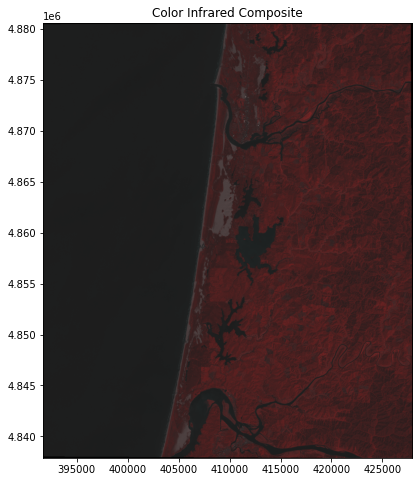

In [256]:
# Plot as Color Infrared Composite image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(color_ir_comp, extent=full_extent)
ax.set_title("Color Infrared Composite")
plt.show()

### b) Creating an NDVI image

In [257]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndvi = np.divide((all_bands[:,:,4].astype(float) - all_bands[:,:,3].astype(float)), \
                 (all_bands[:,:,4].astype(float) + all_bands[:,:,3].astype(float)))

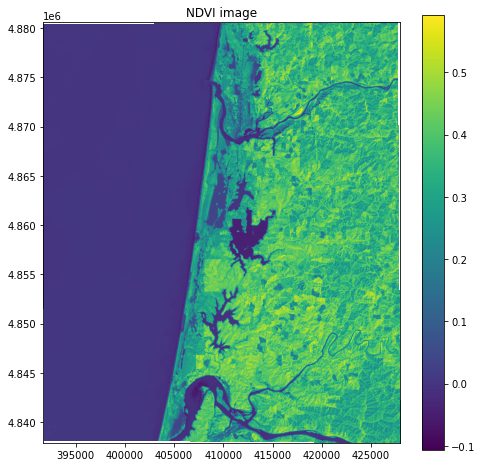

In [258]:
# Plot NDVI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndvi, extent=full_extent)
ax.set_title("NDVI image")
fig.colorbar(im, orientation='vertical')
plt.show()

# Question 4
### a) Produce an NDWI histogram for the Landsat image of Florence 

In [268]:
# Compute NDWI
np.seterr(divide='ignore', invalid='ignore')
ndwi = np.divide((all_bands[:,:,2].astype(float) - all_bands[:,:,4].astype(float)), \
                 (all_bands[:,:,2].astype(float) + all_bands[:,:,4].astype(float)))

In [269]:
ndwi

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ..., -0.29082536,
        -0.31481248, -0.30104966],
       [        nan,         nan,         nan, ..., -0.32622883,
        -0.30386218, -0.27118251],
       [        nan,         nan,         nan, ..., -0.34158455,
        -0.27173558, -0.30858688]])

Text(0.5, 0, 'NWDI Value')

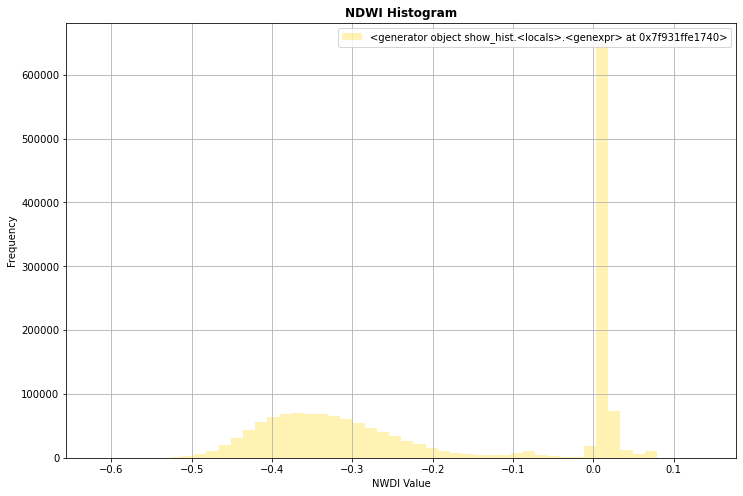

In [279]:
# Plot NDVI Histogram
fig, axes = plt.subplots(figsize=(12,8))
show_hist(
     ndwi, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', ax = axes, title="NDWI Histogram")
axes.set_xlabel("NWDI Value")

### b) Choose a threshold and produce a binary water mask

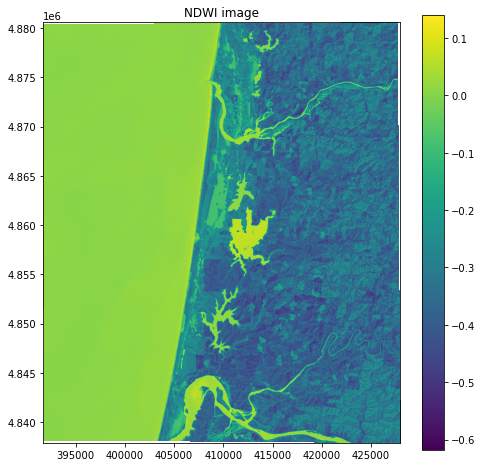

In [280]:
# Plot NDVI image
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndwi, extent=full_extent)
ax.set_title("NDWI image")
fig.colorbar(im, orientation='vertical')
plt.show()

In [289]:
# Note: The water in this image shows up in the 0.05-0.1 range
# Create a binary mask
ndwi_mask = np.copy(ndwi)
not_water = ndwi_mask[ndwi_mask < -0.05] = -1
water = ndwi_mask[ndwi_mask >= -0.05] = 1

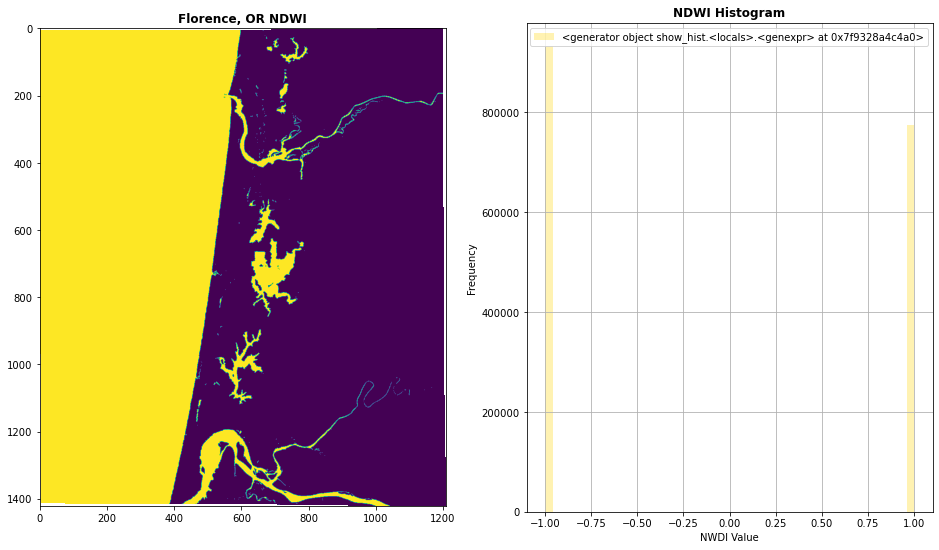

In [293]:
# Plot NDWI binary mask and binary mask histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9))
show(ndwi_mask, ax = ax1, title = "Florence, OR NDWI")
show_hist(ndwi_mask, bins = 50, histtype='stepfilled',
           lw=0.0, stacked=False, alpha=0.3, ax= ax2, title = "NDWI Histogram" )
ax2.set_xlabel("NWDI Value")
plt.show()

### c) Compute the area of water in the image (including ocean)

In [297]:
water_px = np.sum(ndwi_mask == 1)
water_px

774639

In [301]:
# Note: Landsat spatial resolution is 30x30 m
# Calculate area of water px
water_area = water_px * 30
# Convert to square km
water_area_km = water_area / 1000000
water_area_km

23.23917

### In this Landsat image of Florence, OR, there is 23.23917 km<sup>2</sup> of water (including the ocean).